### Annotations
$s_x$ - standard deviation of the sample

$\sigma$ - standard deviation of the population

$n$ - size of the sample

$N$ - size of the population

$\bar{x}$ - mean of the sample

$\mu$ - mean of the population

## Proving the equation for a sample is the following using a simple simulation

\begin{equation}
s_x = \sqrt{\frac{\sum_{n=1}^{n} (x_i-\bar{x})}{n-1}}
\end{equation}

where $s_x$ is the standard deviation of the sample and $\bar{x}$ is the mean of the sample.

The standard deviation of the population of size $N$ is:

\begin{equation}
\sigma = \sqrt{\frac{\sum_{N=1}^{N} (x_i-\mu)}{N}}
\end{equation}

In [30]:
import numpy as np
import matplotlib.pyplot as plt

### Population
First let's make a population, a normal distribution with $\mu = 10$, $\sigma = 2$ and $N = 1000$. We'll be getting the approximate values using numpy.

In [31]:
population = np.random.normal(loc=10, scale=2, size=1000)

print('Mean of the population: ', population.mean())
print('Standard deviation of the population: ', population.std())

Mean of the population:  10.007736017167982
Standard deviation of the population:  2.014524119610725


### Standard deviation functions
Coming up are three different equations for the standard deviation of a sample with size $n$.

1. Equation corresponding to function **_std_n_**:
\begin{equation}
s_x = \sqrt{\frac{\sum_{n=1}^{n} (x_i-\bar{x})}{n}}
\end{equation}

2. Equation corresponding to function **_std_n_1_**:
\begin{equation}
s_x = \sqrt{\frac{\sum_{n=1}^{n} (x_i-\bar{x})}{n-1}}
\end{equation}

3. Equation corresponding to function **_std_n_2_**:
\begin{equation}
s_x = \sqrt{\frac{\sum_{n=1}^{n} (x_i-\bar{x})}{n-2}}
\end{equation}

In [32]:
def std_n(arr):
    return np.sqrt(np.power((arr-arr.mean()), 2).sum()/len(arr))

def std_n_1(arr):
    return np.sqrt(np.power((arr-arr.mean()), 2).sum()/(len(arr)-1))

def std_n_2(arr):
    return np.sqrt(np.power((arr-arr.mean()), 2).sum()/(len(arr)-2))

### Simulation
In the next few cells, we are going to select a random sample size (**sample_size**) and number of samples (**number_samples**) to be drawn from the population. Compute the standard deviation and the plot the graph against the population standard deviation

In [33]:
sample_size = 30
number_samples = 500

std_n_list = []
std_n_1_list = []
std_n_2_list = []

for _ in range(number_samples):
    sample = np.random.choice(population, size=sample_size)
    std_n_list.append(std_n(sample))
    std_n_1_list.append(std_n_1(sample))
    std_n_2_list.append(std_n_2(sample))

### Plotting
It's pretty clear from the plot that the line that is associated to $n-1$ is more closer to the population mean.

Text(0, 0.5, 'Mean of standard deviations')

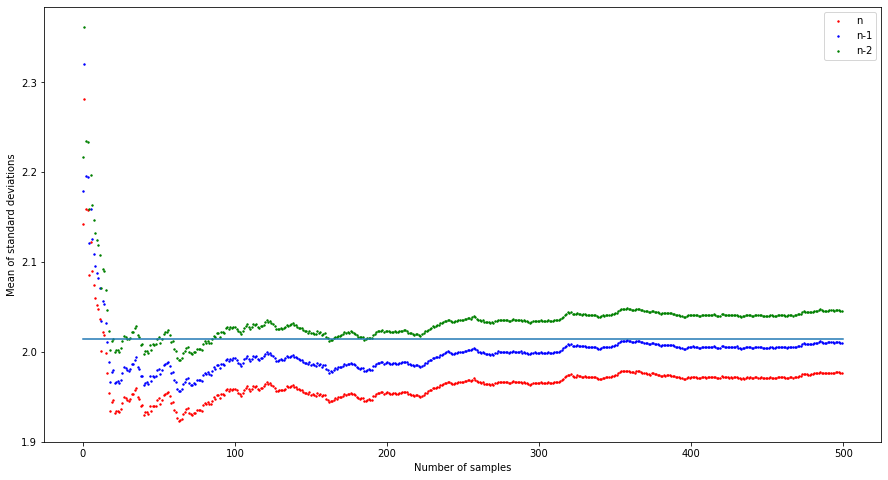

In [34]:
data_n = np.cumsum(std_n_list)/np.cumsum(np.ones(len(std_n_list)))
data_n_1 = np.cumsum(std_n_1_list)/np.cumsum(np.ones(len(std_n_1_list)))
data_n_2 = np.cumsum(std_n_2_list)/np.cumsum(np.ones(len(std_n_2_list)))

plt.figure(figsize=(15, 8))

std_n_plot = plt.scatter([i for i in range(len(std_n_list))], data_n, s=2, color='r')
std_n_1_plot = plt.scatter([i for i in range(len(std_n_1_list))], data_n_1, s=2, color='b')
std_n_2_plot = plt.scatter([i for i in range(len(std_n_2_list))], data_n_2, s=2, color='g')
plt.plot((0, len(std_n_list)), (population.std(), population.std()))

plt.legend((std_n_plot, std_n_1_plot, std_n_2_plot), ('n', 'n-1', 'n-2'))
plt.xlabel('Number of samples')
plt.ylabel('Mean of standard deviations')